## **Importing Libraries**

In [36]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans

import pandas as pd
import numpy as np

In [37]:
# from nltk.tokenize import word_tokenize #Used to extract words from documents
from nltk.stem import WordNetLemmatizer #Used to lemmatize words
from sklearn.manifold import TSNE
# from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [38]:
# from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
# from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

In [39]:
import nltk
from utils import *

## **Reading 20 Newsgroups Dataset**

In [40]:
# Selected 3 categories from the 20 newsgroups dataset

categories = [
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
]

print("Loading 20 newsgroups dataset for categories:")
print(categories)

Loading 20 newsgroups dataset for categories:
['talk.religion.misc', 'comp.graphics', 'sci.space']


In [41]:
News_df = fetch_20newsgroups(subset='all', categories=categories, 
                             shuffle=False, remove=('headers', 'footers', 'quotes'))

In [42]:
News_df.data[0]

'\n\nI think I can. Largely as a result of efforts by people reading this group\nwriting letters and making phone calls the following has happened:\n\n1. NASA reprogrammed funds to keep NASP alive in 1991.\n2. Efforts to kill DC-X and the SSRT progam where twice twarted\n   (Feb. and June of last year).\n3. Gouldin kept his job in spite of heavy lobbying against him.\n\nThis may not be what Mark was thinking of but it shows that the\nreaders of sci.space DO have power and influence.\n\n  Allen\n'

In [43]:
News_df.target

array([1, 0, 1, ..., 0, 0, 1])

## **Redaing PeopleWiki Datset**

In [44]:
#We will retrieve the Wikipedia Articles Dataset
dataset = 'Dataset/people_wiki.csv'
people_wiki_df = pd.read_csv(dataset)
#Lets see what we have in the dataset
people_wiki_df.head(3)

,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...


##  Looking at raw texts 


In [45]:
print(News_df.data[0])



I think I can. Largely as a result of efforts by people reading this group
writing letters and making phone calls the following has happened:

1. NASA reprogrammed funds to keep NASP alive in 1991.
2. Efforts to kill DC-X and the SSRT progam where twice twarted
   (Feb. and June of last year).
3. Gouldin kept his job in spite of heavy lobbying against him.

This may not be what Mark was thinking of but it shows that the
readers of sci.space DO have power and influence.

  Allen



In [46]:
len(News_df.data)

2588

In [47]:
News_sample = News_df.data[0]

In [48]:
News_sample

'\n\nI think I can. Largely as a result of efforts by people reading this group\nwriting letters and making phone calls the following has happened:\n\n1. NASA reprogrammed funds to keep NASP alive in 1991.\n2. Efforts to kill DC-X and the SSRT progam where twice twarted\n   (Feb. and June of last year).\n3. Gouldin kept his job in spite of heavy lobbying against him.\n\nThis may not be what Mark was thinking of but it shows that the\nreaders of sci.space DO have power and influence.\n\n  Allen\n'

In [49]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/israa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /home/israa/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [51]:
# remove old style retweet text "RT"
News_sample2 = re.sub(r'^RT[\s]+', '', News_sample)

# remove hyperlinks
News_sample2 = re.sub(r'https?://[^\s\n\r]+', '', News_sample2)

# remove hashtags
# only removing the hash # sign from the word
News_sample2 = re.sub(r'#', '', News_sample2)

print(News_sample2)



I think I can. Largely as a result of efforts by people reading this group
writing letters and making phone calls the following has happened:

1. NASA reprogrammed funds to keep NASP alive in 1991.
2. Efforts to kill DC-X and the SSRT progam where twice twarted
   (Feb. and June of last year).
3. Gouldin kept his job in spite of heavy lobbying against him.

This may not be what Mark was thinking of but it shows that the
readers of sci.space DO have power and influence.

  Allen



In [52]:
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

# tokenize tweets
News_sample2_tokens = tokenizer.tokenize(News_sample2)

print('Tokenized string:')
print(News_sample2_tokens)

Tokenized string:
['i', 'think', 'i', 'can', '.', 'largely', 'as', 'a', 'result', 'of', 'efforts', 'by', 'people', 'reading', 'this', 'group', 'writing', 'letters', 'and', 'making', 'phone', 'calls', 'the', 'following', 'has', 'happened', ':', '1', '.', 'nasa', 'reprogrammed', 'funds', 'to', 'keep', 'nasp', 'alive', 'in', '1991', '.', '2', '.', 'efforts', 'to', 'kill', 'dc-x', 'and', 'the', 'ssrt', 'progam', 'where', 'twice', 'twarted', '(', 'feb', '.', 'and', 'june', 'of', 'last', 'year', ')', '.', '3', '.', 'gouldin', 'kept', 'his', 'job', 'in', 'spite', 'of', 'heavy', 'lobbying', 'against', 'him', '.', 'this', 'may', 'not', 'be', 'what', 'mark', 'was', 'thinking', 'of', 'but', 'it', 'shows', 'that', 'the', 'readers', 'of', 'sci.space', 'do', 'have', 'power', 'and', 'influence', '.', 'allen']


### stopwords english overview

In [53]:
stopwords_english = stopwords.words('english') 

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "s

In [54]:
print('\033[92m')
print(News_sample2_tokens)
print('\033[94m')

tweets_clean = []

for word in News_sample2_tokens: 
    if (word not in stopwords_english and  word not in string.punctuation):  
        tweets_clean.append(word)

print("After removing stop words and punctuation:")
print(tweets_clean)


['i', 'think', 'i', 'can', '.', 'largely', 'as', 'a', 'result', 'of', 'efforts', 'by', 'people', 'reading', 'this', 'group', 'writing', 'letters', 'and', 'making', 'phone', 'calls', 'the', 'following', 'has', 'happened', ':', '1', '.', 'nasa', 'reprogrammed', 'funds', 'to', 'keep', 'nasp', 'alive', 'in', '1991', '.', '2', '.', 'efforts', 'to', 'kill', 'dc-x', 'and', 'the', 'ssrt', 'progam', 'where', 'twice', 'twarted', '(', 'feb', '.', 'and', 'june', 'of', 'last', 'year', ')', '.', '3', '.', 'gouldin', 'kept', 'his', 'job', 'in', 'spite', 'of', 'heavy', 'lobbying', 'against', 'him', '.', 'this', 'may', 'not', 'be', 'what', 'mark', 'was', 'thinking', 'of', 'but', 'it', 'shows', 'that', 'the', 'readers', 'of', 'sci.space', 'do', 'have', 'power', 'and', 'influence', '.', 'allen']

After removing stop words and punctuation:
['think', 'largely', 'result', 'efforts', 'people', 'reading', 'group', 'writing', 'letters', 'making', 'phone', 'calls', 'following', 'happened', '1', 'nasa', 'reprog

### Stemming

Stemming is the process of converting a word to its most general form, or stem. This helps in reducing the size of our vocabulary.

Consider the words: 
 * **learn**
 * **learn**ing
 * **learn**ed
 * **learn**t
 
All these words are stemmed from its common root **learn**. However, in some cases, the stemming process produces words that are not correct spellings of the root word. For example, **happi** and **sunni**. That's because it chooses the most common stem for related words. For example, we can look at the set of words that comprises the different forms of happy:

 * **happ**y
 * **happi**ness
 * **happi**er
 
We can see that the prefix **happi** is more commonly used. We cannot choose **happ** because it is the stem of unrelated words like **happen**.

In [55]:
print('\033[92m')
print(tweets_clean)
print('\033[94m')

# Instantiate stemming class
stemmer = PorterStemmer() 

# Create an empty list to store the stems
News_sample2_tokens_stem = [] 

for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    News_sample2_tokens_stem.append(stem_word)  # append to the list

print('stemmed words:')
print(News_sample2_tokens_stem)


['think', 'largely', 'result', 'efforts', 'people', 'reading', 'group', 'writing', 'letters', 'making', 'phone', 'calls', 'following', 'happened', '1', 'nasa', 'reprogrammed', 'funds', 'keep', 'nasp', 'alive', '1991', '2', 'efforts', 'kill', 'dc-x', 'ssrt', 'progam', 'twice', 'twarted', 'feb', 'june', 'last', 'year', '3', 'gouldin', 'kept', 'job', 'spite', 'heavy', 'lobbying', 'may', 'mark', 'thinking', 'shows', 'readers', 'sci.space', 'power', 'influence', 'allen']

stemmed words:
['think', 'larg', 'result', 'effort', 'peopl', 'read', 'group', 'write', 'letter', 'make', 'phone', 'call', 'follow', 'happen', '1', 'nasa', 'reprogram', 'fund', 'keep', 'nasp', 'aliv', '1991', '2', 'effort', 'kill', 'dc-x', 'ssrt', 'progam', 'twice', 'twart', 'feb', 'june', 'last', 'year', '3', 'gouldin', 'kept', 'job', 'spite', 'heavi', 'lobbi', 'may', 'mark', 'think', 'show', 'reader', 'sci.spac', 'power', 'influenc', 'allen']


In [56]:
News_df.target

array([1, 0, 1, ..., 0, 0, 1])

In [57]:
# process the whole dataset of News_df
News_df_clean = []
for tweet in News_df.data:
    News_df_clean.append(process_tweet(tweet))

In [58]:
print(News_df_clean[0])

['think', 'largely', 'result', 'effort', 'people', 'reading', 'group', 'writing', 'letter', 'making', 'phone', 'call', 'following', 'happened', 'nasa', 'reprogrammed', 'fund', 'keep', 'nasp', 'alive', '.\n.', 'effort', 'kill', 'dc-x', 'ssrt', 'progam', 'twice', 'twarted', 'feb', 'june', 'last', 'year', '.\n.', 'gouldin', 'kept', 'job', 'spite', 'heavy', 'lobbying', 'may', 'mark', 'thinking', 'show', 'reader', 'sci.space', 'power', 'influence', 'allen']


In [59]:
print(News_df_clean[1000])

['hello', 'netters', 'finally', 'received', 'information', 'imagine', 'pc', 'presently', 'shipping', 'version', 'software', 'release', 'version', 'first', 'quarter', 'say', 'upgrade', '..', 'purchase', 'imagine', 'cost', 'upgrading', 'another', 'eligible', 'call', 'info', 'modeler', 'plus', 'shipping', 'handling', 'requires', 'pc', 'meg', 'math', 'coprocessor', 'do', 'microsoft', 'mouse', 'svga', 'card', 'thanks', 'reply', 'product', 'received', 'many', 'contrasting', 'reply', 'scrounge', 'money', 'together', 'think', 'take', 'plunge', 'thanks', 'info', 'impulse', 'want', 'find', 'get', 'sheet', 'sent', 'impulse', 'inc', 'xerxes', 'avenue', 'north', 'minneapolis', 'mn', 'thanks', 'reply', 'scott', 'scott', 'snowiss', 'sasst', 'pitt.edu']


## First method

In [60]:
K = 4

In [61]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

X = vectorizer.fit_transform(News_df.data)

y_true = np.array(News_df.target)

In [62]:
print(X.shape)

(2588, 1000)


In [63]:
normalizer = Normalizer()

X_normalized = normalizer.fit_transform(X)

In [64]:
model = KMeans(n_clusters=K, init='k-means++', max_iter=1000, n_init=100)

model.fit(X_normalized)

KMeans(max_iter=1000, n_clusters=4, n_init=100)

In [65]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(K):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :30]:
        print(' %s' % terms[ind])

clusters = model.labels_.tolist()

Top terms per cluster:
Cluster 0:
 just
 think
 don
 like
 people
 know
 time
 good
 ve
 does
 way
 say
 did
 want
 make
 right
 going
 new
 point
 question
 things
 use
 actually
 long
 better
 sure
 maybe
 problem
 used
 read
Cluster 1:
 thanks
 graphics
 image
 file
 files
 know
 format
 program
 help
 does
 ftp
 edu
 looking
 gif
 hi
 need
 like
 use
 advance
 mail
 software
 images
 bit
 windows
 code
 available
 3d
 color
 computer
 information
Cluster 2:
 god
 jesus
 christian
 bible
 people
 christians
 christ
 believe
 did
 life
 don
 man
 say
 faith
 kent
 children
 know
 love
 religion
 right
 think
 christianity
 good
 church
 heaven
 does
 just
 word
 said
 sin
Cluster 3:
 space
 shuttle
 nasa
 launch
 hst
 station
 mission
 orbit
 earth
 program
 satellite
 cost
 like
 moon
 sci
 lunar
 just
 time
 long
 use
 gov
 don
 year
 think
 solar
 know
 new
 satellites
 dc
 years


In [66]:
print("Silhouette Score: %0.3f" % metrics.silhouette_score(X_normalized, clusters, sample_size=1000))

Silhouette Score: 0.013


In [69]:

# Calculate the purity score
purity = purity_score(y_true, clusters)
print("Purity Score: %0.3f" % purity)

Purity Score: 0.686


### Visualization

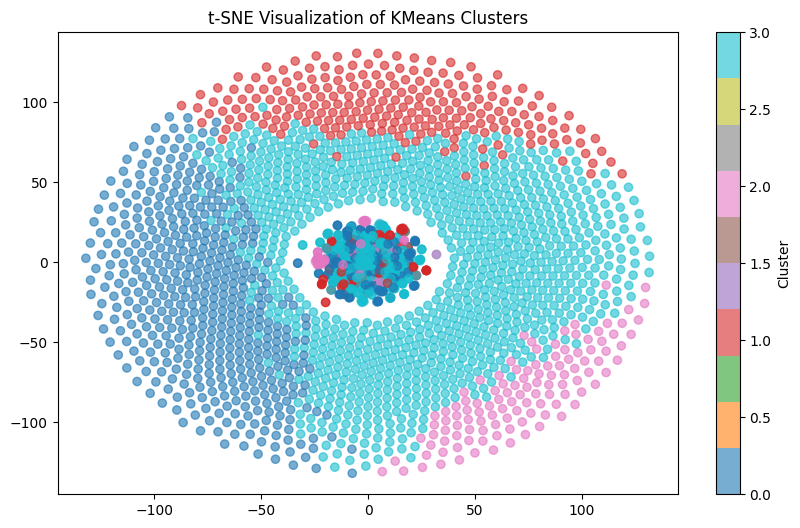

In [88]:
tsne_cluster_visualization(X= X, model= model)

### Elbow Method to find optimal clusters

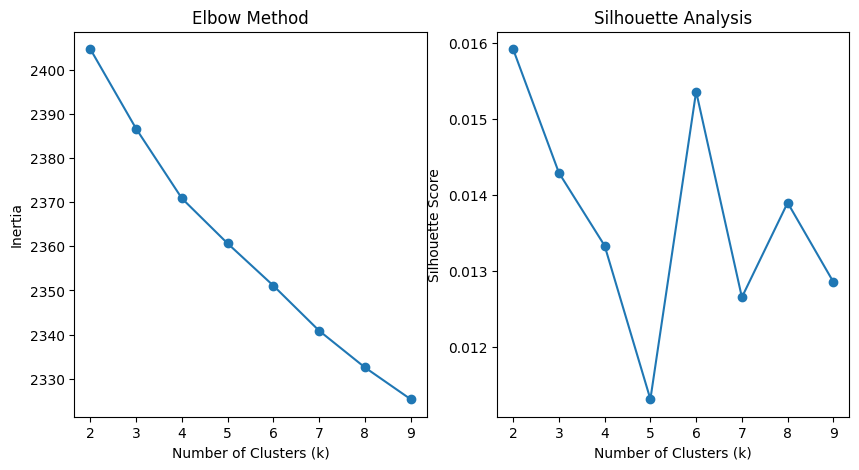

In [83]:
plot_elbow_and_silhouette(X_normalized)

## Second Method

In [96]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000, ngram_range=(3,3))

X = vectorizer.fit_transform(News_df.data)

y_true = np.array(News_df.target)

In [97]:
K = 10

In [98]:
normalizer = Normalizer()

X_normalized = normalizer.fit_transform(X)

In [99]:
model = KMeans(n_clusters=K, init='k-means++', max_iter=1000, n_init=100)

model.fit(X_normalized)

KMeans(max_iter=1000, n_clusters=10, n_init=100)

In [100]:
print("Top terms per cluster:")

order_centroids = model.cluster_centers_.argsort()[:, ::-1]

terms = vectorizer.get_feature_names_out()

for i in range(K):

    print("Cluster %d:" % i),

    for ind in order_centroids[i, :30]:

        print(' %s' % terms[ind]),

Top terms per cluster:
Cluster 0:
 space technology investor
 larrison space technology
 wales larrison space
 element sets carried
 electronic journal astronomical
 egalon larc nasa
 eece unm edu
 ee lbl gov
 edu send material
 edu pub graphics
 edu mirrors msdos
 edu high just
 edu graphics graphics
 edu file pub
 edu file info
 edu file contrib
 edu file atari
 edu alias rtfm
 edu 336 9591
 edu 18 24
 edu 18 172
 edu 141 142
 edu 140 252
 edu 130 167
 edu 129 97
 edu 129 24
 edu 128 32
 edu 128 171
 editors public domain
 ed academic press
Cluster 1:
 help appreciated thanks
 help greatly appreciated
 available anonymous ftp
 vnet ibm com
 pluto fast flyby
 gamma ray bursters
 hidden line removal
 wuarchive wustl edu
 jpl nasa gov
 lord jesus christ
 space station redesign
 earth magnetic field
 larc nasa gov
 long time ago
 san jose ca
 april 23 1993
 arc nasa gov
 command loss timer
 european space agency
 alt binaries pictures
 thanks advance help
 world std com
 talk religion mi

In [101]:
print("Silhouette Score: %0.3f" % metrics.silhouette_score(X_normalized, clusters, sample_size=1000))

Silhouette Score: 0.749


### Visualization

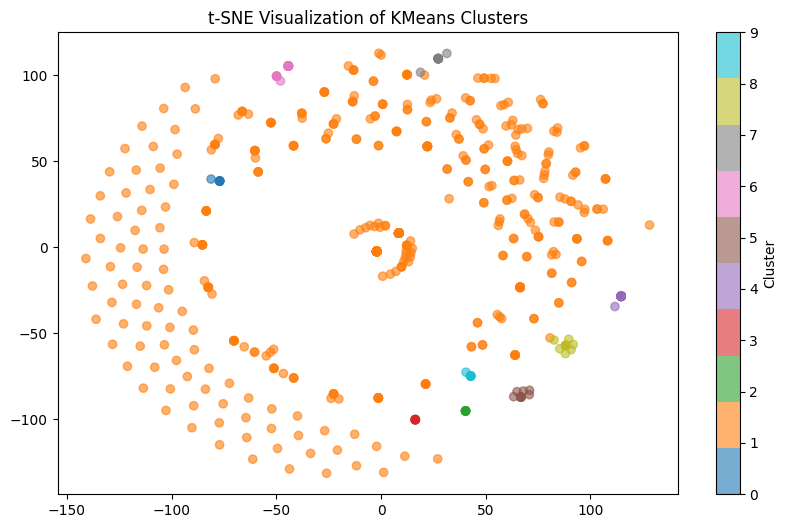

In [102]:
tsne_cluster_visualization(X= X, model= model)